In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [259]:
df = pd.read_excel('../data/Kickstarter.xlsx')
df = df[(df['state'] == 'successful') | (df['state'] == 'failed')]
df.columns

Index(['id', 'name', 'goal', 'pledged', 'state', 'disable_communication',
       'country', 'currency', 'deadline', 'state_changed_at', 'created_at',
       'launched_at', 'staff_pick', 'backers_count', 'static_usd_rate',
       'usd_pledged', 'category', 'spotlight', 'name_len', 'name_len_clean',
       'blurb_len', 'blurb_len_clean', 'deadline_weekday',
       'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday',
       'deadline_month', 'deadline_day', 'deadline_yr', 'deadline_hr',
       'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_yr',
       'state_changed_at_hr', 'created_at_month', 'created_at_day',
       'created_at_yr', 'created_at_hr', 'launched_at_month',
       'launched_at_day', 'launched_at_yr', 'launched_at_hr',
       'create_to_launch_days', 'launch_to_deadline_days',
       'launch_to_state_change_days'],
      dtype='object')

In [295]:
df.shape

(13274, 90)

In [297]:
df[df['launch_to_deadline_days']==df['launch_to_state_change_days']]

,goal,staff_pick,backers_count,usd_pledged,spotlight,name_len_clean,blurb_len_clean,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,...,category_Web,category_Webseries,category_unknown,state_changed_at_yr_2010,state_changed_at_yr_2011,state_changed_at_yr_2012,state_changed_at_yr_2013,state_changed_at_yr_2014,state_changed_at_yr_2015,state_changed_at_yr_2016


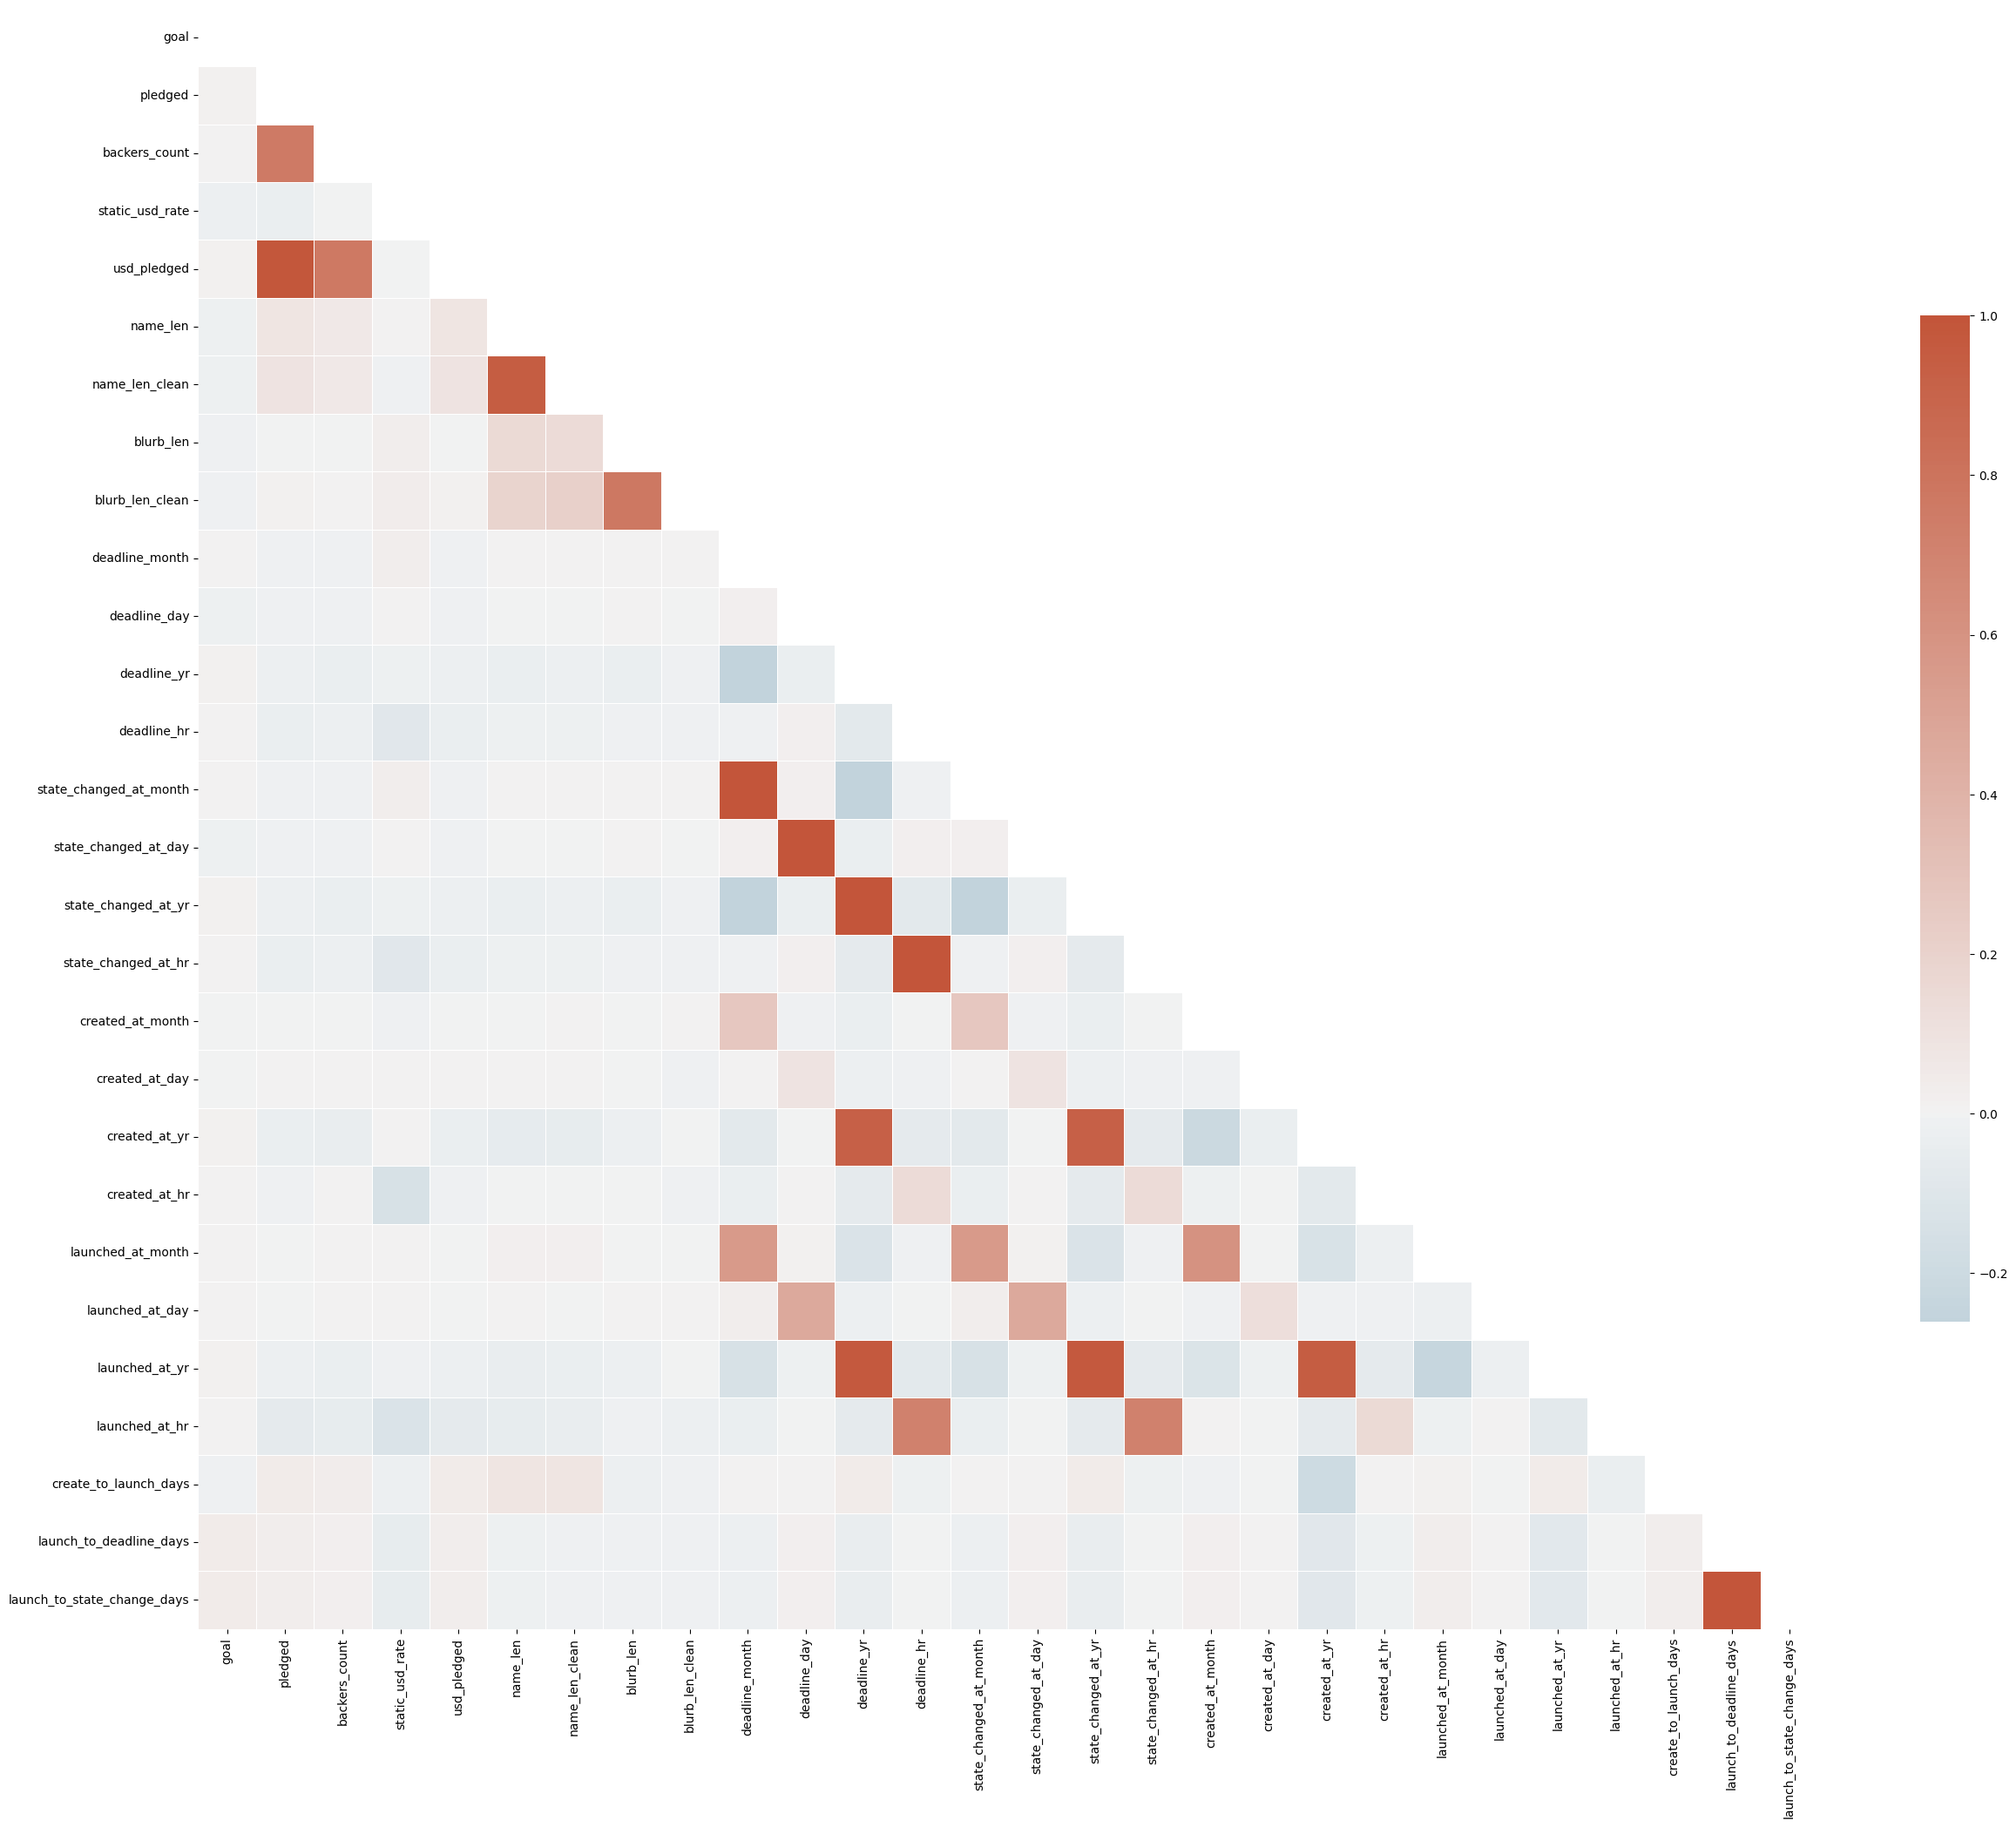

In [196]:
# get columns that are numeric
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('id')
# df[numeric_cols].corr()

# plot correlation matrix
corr = df[numeric_cols].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=90)
plt.show()

In [260]:

# drop all columns that does not exist at the launch of a project
df.drop([
    'pledged',
    # 'backers_count',
    # 'staff_pick',
    # 'spotlight',
    # 'usd_pledged',
    # 'state_changed_at_weekday',
    # 'state_changed_at_month',
    # 'state_changed_at_day',
    # 'state_changed_at_yr',
    # 'state_changed_at_hr',
    # 'launch_to_state_change_days'
], axis=1, inplace=True)

# convert goal to usd
df['goal'] = df['goal']*df['static_usd_rate']
# df['pledged'] = df['pledged']*df['static_usd_rate']


# drop columns for curerncy conversion
df.drop(['static_usd_rate', 'currency'], axis=1, inplace=True)

# drop all columns that have the same value
df.drop(['disable_communication'], axis=1, inplace=True)

# drop deadline_at, state_change_at, created_at, launched_at since the pre-processing is already done in other columns
df.drop(['deadline', 'created_at', 'launched_at','state_changed_at'], axis=1, inplace=True)

# Assuming df is your DataFrame and 'column' is the column from which you want to remove outliers
z_scores = np.abs(stats.zscore(df['goal']))
df = df[(z_scores < 3)]

z_scores = np.abs(stats.zscore(df['usd_pledged']))
df = df[(z_scores < 3)]


df.drop(['id', 'name'], axis=1, inplace=True)

# hours seem to be too granular, drop it for now
df.drop(['created_at_hr', 'launched_at_hr',
        'deadline_hr','state_changed_at_hr'], axis=1, inplace=True)

# drop some dates
df.drop(['launched_at_day', 'launched_at_month', 'launched_at_yr',
        'launched_at_weekday'], axis=1, inplace=True)

# df.drop(['deadline_weekday','deadline_yr','deadline_month','deadline_day'],axis=1,inplace=True)

df.drop(['created_at_weekday','state_changed_at_weekday','deadline_weekday'],axis=1,inplace=True)

df.drop(['created_at_day','state_changed_at_day','deadline_day'],axis=1,inplace=True)

# df.drop(['deadline_month','state_changed_at_month','created_at_month'],axis=1,inplace=True)

# df.drop(['created_at_yr', 'state_changed_at_yr','deadline_yr'], axis=1, inplace=True)
df.drop(['created_at_yr','deadline_yr'], axis=1, inplace=True)

df.drop(['name_len', 'blurb_len'], axis=1, inplace=True)

# df.drop(['country'],axis=1,inplace=True)

df = pd.get_dummies(data=df, columns=['state'], drop_first=True)
df = pd.get_dummies(data=df, columns=['country'], drop_first=True)

df.drop([''])

# df = pd.get_dummies(
#     data=df, columns=['created_at_weekday', 'state_changed_at_weekday','deadline_weekday'], drop_first=True)

df = pd.get_dummies(
    data=df, columns=['created_at_month','state_changed_at_month','deadline_month'], drop_first=True)

# df = pd.get_dummies(
#     data=df, columns=['created_at_day','state_changed_at_day','deadline_day'], drop_first=True)

# fill missing values in category using random forest
# Create a LabelEncoder object
# le = LabelEncoder()

# df_known = df[df['category'].notna()]
# df_unknown = df[df['category'].isna()]
# known_cat = df_known['category']
# df_known['category'] = le.fit_transform(known_cat)

# # Prepare the data for training the classifier
# X_train = df_known.drop(columns=['category'], axis=1)
# y_train = df_known['category']
# X_test = df_unknown.drop(columns=['category'], axis=1)

# # Train the classifier
# clf = RandomForestClassifier()
# clf.fit(X_train, y_train)
# pred = clf.predict(X_test)
# pred = le.inverse_transform(pred)
# df.loc[df['category'].isna(), 'category'] = pred

df['category'].fillna('unknown', inplace=True)

# standardize numerical columns
# standardizer = StandardScaler()
# goal = standardizer.fit_transform(df[['goal']])
# df['goal'] = goal

In [261]:
scaler = StandardScaler()
numerical = ['goal','backers_count','usd_pledged','name_len_clean','blurb_len_clean','create_to_launch_days','launch_to_deadline_days','launch_to_state_change_days']
df[numerical] = scaler.fit_transform(df[numerical])
df = pd.get_dummies(data=df,columns=['category'],drop_first=True)
df = pd.get_dummies(data=df,columns=['state_changed_at_yr'],drop_first=True)
df

,goal,staff_pick,backers_count,usd_pledged,spotlight,name_len_clean,blurb_len_clean,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,...,category_Web,category_Webseries,category_unknown,state_changed_at_yr_2010,state_changed_at_yr_2011,state_changed_at_yr_2012,state_changed_at_yr_2013,state_changed_at_yr_2014,state_changed_at_yr_2015,state_changed_at_yr_2016
0,-0.155169,False,-0.146451,-0.124560,False,1.185738,0.293876,0.155118,-0.367363,-0.367381,...,False,False,False,False,False,False,False,False,False,True
1,-0.233919,False,-0.008824,0.129797,True,0.357649,0.608566,-0.372467,0.890364,0.890365,...,False,False,True,False,False,False,False,False,False,True
4,-0.289345,False,-0.224792,-0.282326,True,-0.056395,-0.020815,-0.452103,-1.708938,-1.708977,...,False,False,False,False,False,False,False,False,False,True
5,-0.282447,False,-0.235379,-0.257962,True,-0.470440,0.293876,-0.253014,2.148091,2.148111,...,False,False,False,False,False,False,False,False,False,True
6,-0.061692,False,-0.267139,-0.320006,False,-1.298529,0.608566,-0.233105,0.219576,0.219567,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15467,-0.294864,False,-0.233261,-0.325823,False,-0.470440,-2.853031,-0.462057,2.064243,2.064262,...,False,False,False,False,False,False,False,False,False,False
15469,-0.285896,False,-0.286195,-0.341002,False,-1.712573,0.608566,-0.462057,2.315788,2.315811,...,False,False,False,False,False,False,False,False,False,False
15470,-0.301418,False,-0.281960,-0.340849,False,-0.056395,0.608566,-0.462057,-0.870454,-0.870480,...,False,False,False,False,False,False,False,False,False,False
15472,-0.299693,True,-0.078696,-0.294571,True,-0.884484,0.608566,-0.462057,0.974213,0.974215,...,False,False,False,False,False,False,False,False,False,False


In [262]:
# train test split
from sklearn.model_selection import train_test_split
df.rename({"state_successful":"state"},axis=1,inplace=True)
X = df.drop(['state'],axis=1)
y = df['state']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## Hierarchical clustering 

Text(0.5, 1.0, 'Silhouette score vs Number of clusters')

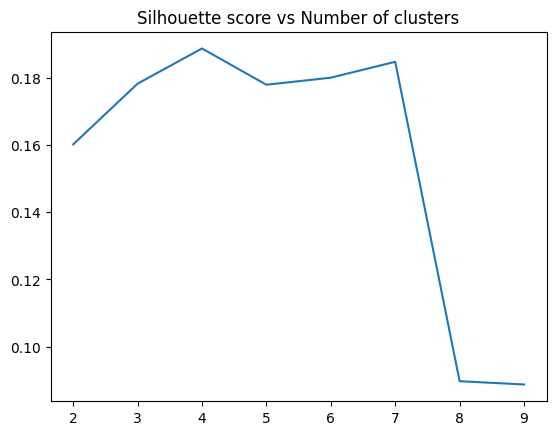

In [287]:
# hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import fowlkes_mallows_score, silhouette_score, calinski_harabasz_score

# elbow method
scores = []
for n_clusters in range(2, 10):
    scores.append(
        silhouette_score(X_train, AgglomerativeClustering(n_clusters=n_clusters).fit_predict(X_train)))
plt.plot(range(2, 10), scores)
plt.title("Silhouette score vs Number of clusters")

In [166]:
# use grid search to find the best parameters for agglomerative clustering
from sklearn.model_selection import GridSearchCV

params = {'n_clusters':range(2,10),'linkage':['ward','complete','average'],"affinity":['euclidean','l1','l2','manhattan','cosine']}
# grid = GridSearchCV(AgglomerativeClustering(),params)
i_list = []
j_list = []
k_list = []
FMS = []
sil_score = []
psedo_f = []


for i in range(2,10):
    for j in ['ward','complete','average']:
        for k in ['euclidean','l1','l2','manhattan','cosine']:
            if j == 'ward' and k != 'euclidean':
                continue
            model = AgglomerativeClustering(n_clusters=i,linkage=j,affinity=k)
            grid = model.fit(df)
            labels = grid.labels_
            i_list.append(i)
            j_list.append(j)
            k_list.append(k)
            sil_score.append(silhouette_score(df,labels))
            # FMS.append(fowlkes_mallows_score(df,labels))
            psedo_f.append(calinski_harabasz_score(df,labels))

/Users/yyy/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


KeyboardInterrupt: 

In [135]:
res = pd.DataFrame({"n_clusters":i_list,"linkage":j_list,"affinity":k_list,"silouette":sil_score,"psedo_f":psedo_f})
res.sort_values(by=['silouette'],ascending=False)

ValueError: All arrays must be of the same length

In [131]:
agglo_model = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='l1')
agglo_model.fit(df)
labels = agglo_model.labels_
agglo_res = df.copy()
agglo_res['cluster'] = labels
agglo_res

/Users/yyy/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,goal,name_len_clean,blurb_len_clean,create_to_launch_days,launch_to_deadline_days,state_successful,country_AU,country_BE,country_CA,country_CH,...,deadline_yr_2015,deadline_yr_2016,created_at_yr_2010,created_at_yr_2011,created_at_yr_2012,created_at_yr_2013,created_at_yr_2014,created_at_yr_2015,created_at_yr_2016,cluster
0,21449.83740,8.0,14.0,62,30,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,0
1,10034.45163,6.0,15.0,9,45,True,False,False,False,False,...,False,True,False,False,False,False,False,False,True,0
4,2000.00000,5.0,13.0,1,14,True,False,False,False,False,...,False,True,False,False,False,False,False,False,True,0
5,3000.00000,4.0,14.0,21,60,True,False,False,False,False,...,False,True,False,False,False,False,False,False,True,0
6,35000.00000,2.0,15.0,23,37,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15467,1200.00000,4.0,4.0,0,59,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
15469,2500.00000,1.0,15.0,0,62,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
15470,250.00000,5.0,15.0,0,24,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
15472,500.00000,3.0,15.0,0,46,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0


## K-Means

In [288]:
# kmeans
from sklearn.cluster import KMeans
from scipy.stats import f

inertia = []
psedo_f = []
silouette = []

# Finding optimal K
for i in range (2,10):    
    kmeans = KMeans(n_clusters=i)
    model = kmeans.fit(df)
    labels = model.labels_
    score = calinski_harabasz_score(df, labels)
    psedo_f.append(score)
    inertia.append(kmeans.inertia_)
    silouette.append(silhouette_score(df,labels))
print(silouette)
print(inertia)
    # print(i,'silhouette score:',silhouette_score(df,labels))

/Users/yyy/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yyy/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yyy/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yyy/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

[0.18091974621929668, 0.19124862591475328, 0.09390698524265757, 0.09826722134806225, 0.08985705298377138, 0.10633234034394519, 0.08576689451377598, 0.08768802712244975]
[154914.51244299003, 138966.88726011565, 130798.39077565377, 123360.92752259033, 119309.3795048417, 111467.3853272799, 108565.47648842585, 104877.84566521598]


In [281]:
silouette

[]

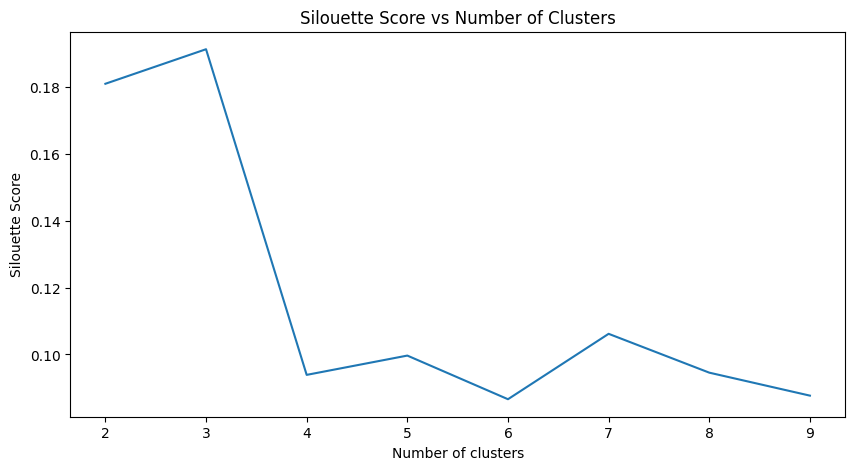

In [285]:
plt.figure(figsize=(10,5))
plt.plot(range(2, 10), silouette)
plt.title('Silouette Score vs Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silouette Score')
plt.show()

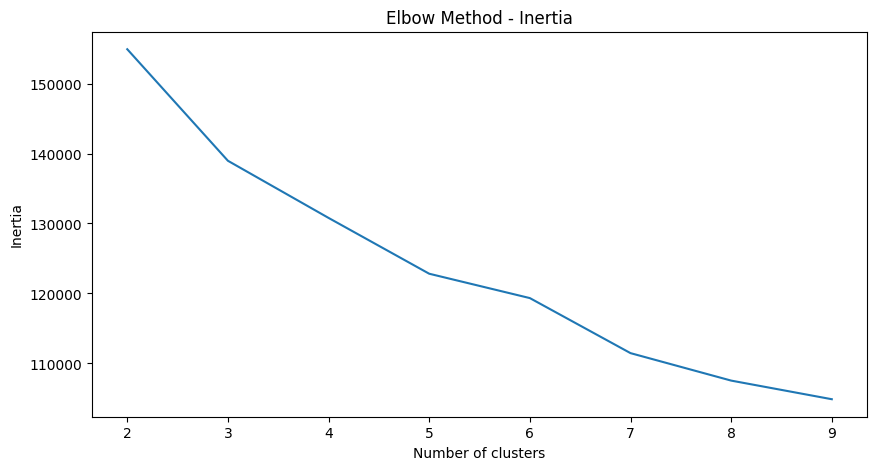

In [286]:
plt.figure(figsize=(10,5))
plt.plot(range(2, 10), inertia)
plt.title('Elbow Method - Inertia')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [301]:
# choose the best k
kmeans = KMeans(n_clusters=3)
model = kmeans.fit(df)

# look at charactereistics of each cluster
df_cluster = df.copy()
df_cluster['cluster'] = model.labels_
k_means_res = df_cluster

# #convert the standardized data back to original scale
k_means_res[numerical] = scaler.inverse_transform(k_means_res[numerical])

k_means_res

/Users/yyy/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,goal,staff_pick,backers_count,usd_pledged,spotlight,name_len_clean,blurb_len_clean,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,...,category_Webseries,category_unknown,state_changed_at_yr_2010,state_changed_at_yr_2011,state_changed_at_yr_2012,state_changed_at_yr_2013,state_changed_at_yr_2014,state_changed_at_yr_2015,state_changed_at_yr_2016,cluster
0,21449.83740,False,66.0,8.484126e+03,False,8.0,14.0,62.0,30.0,30.0,...,False,False,False,False,False,False,False,False,True,1
1,10034.45163,False,131.0,1.845447e+04,True,6.0,15.0,9.0,45.0,45.0,...,False,True,False,False,False,False,False,False,True,0
4,2000.00000,False,29.0,2.300000e+03,True,5.0,13.0,1.0,14.0,14.0,...,False,False,False,False,False,False,False,False,True,1
5,3000.00000,False,24.0,3.255000e+03,True,4.0,14.0,21.0,60.0,60.0,...,False,False,False,False,False,False,False,False,True,0
6,35000.00000,False,9.0,8.230000e+02,False,2.0,15.0,23.0,37.0,37.0,...,False,False,False,False,False,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15467,1200.00000,False,25.0,5.950000e+02,False,4.0,4.0,0.0,59.0,59.0,...,False,False,False,False,False,False,False,False,False,0
15469,2500.00000,False,0.0,-1.818989e-12,False,1.0,15.0,0.0,62.0,62.0,...,False,False,False,False,False,False,False,False,False,0
15470,250.00000,False,2.0,6.000000e+00,False,5.0,15.0,0.0,24.0,24.0,...,False,False,False,False,False,False,False,False,False,1
15472,500.00000,True,98.0,1.820000e+03,True,3.0,15.0,0.0,46.0,46.0,...,False,False,False,False,False,False,False,False,False,0


In [290]:
# Assuming 'model' is your fitted KMeans model
centroids = model.cluster_centers_
centroids

array([[ 2.24272085e-01,  7.41430700e-02, -1.79643350e-01,
        -2.00445655e-01,  2.04918033e-01, -7.10504690e-02,
        -1.38974389e-02,  2.12596994e-02,  1.65509095e+00,
         1.65510353e+00,  2.04918033e-01,  3.35320417e-02,
         1.86289121e-03,  6.29657228e-02,  2.98062593e-03,
         9.68703428e-03,  7.07898659e-03,  5.96125186e-03,
         1.45305514e-02,  9.57526080e-02,  4.84351714e-03,
         1.22950820e-02, -5.55653613e-19,  1.37853949e-02,
         2.60804769e-03,  5.96125186e-03,  3.35320417e-03,
         7.21311475e-01,  7.22801788e-02,  6.92995529e-02,
         7.97317437e-02,  8.15946349e-02,  8.94187779e-02,
         1.15126677e-01,  8.23397914e-02,  8.86736215e-02,
         9.61251863e-02,  8.30849478e-02,  6.44560358e-02,
         6.29657228e-02,  8.68107303e-02,  8.27123696e-02,
         6.70640835e-02,  6.81818182e-02,  7.71236960e-02,
         9.35171386e-02,  8.97913562e-02,  8.71833085e-02,
         7.67511177e-02,  1.06557377e-01,  6.29657228e-0

In [291]:
# analysis of each cluster
# cluster 0
cluster_0 = k_means_res[k_means_res['cluster']==0]
display(cluster_0.describe())

# cluster 1
cluster_1 = k_means_res[k_means_res['cluster']==1]
display(cluster_1.describe())

# cluster 2
cluster_2 = k_means_res[k_means_res['cluster']==2]
display(cluster_2.describe())

,goal,backers_count,usd_pledged,name_len_clean,blurb_len_clean,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,cluster
count,2.684000e+03,2684.000000,2.684000e+03,2684.000000,2684.000000,2684.000000,2684.000000,2684.000000,2684.0
mean,7.645244e+04,50.323398,5.509544e+03,4.964605,13.021982,48.552906,54.120343,54.120343,0.0
std,2.607770e+05,125.806425,1.409933e+04,2.443368,3.282551,102.719491,8.439390,8.439390,0.0
min,1.000000e+00,0.000000,-1.818989e-12,1.000000,1.000000,0.000000,29.000000,29.000000,0.0
25%,5.000000e+03,1.000000,1.386000e+01,3.000000,11.000000,3.000000,45.000000,45.000000,0.0
50%,1.800000e+04,7.000000,3.010000e+02,5.000000,13.000000,13.000000,59.000000,59.000000,0.0
75%,5.000000e+04,36.000000,3.519500e+03,7.000000,15.000000,47.000000,60.000000,60.000000,0.0
max,3.649137e+06,1553.000000,1.356790e+05,13.000000,28.000000,1196.000000,91.000000,91.000000,0.0


,goal,backers_count,usd_pledged,name_len_clean,blurb_len_clean,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,cluster
count,9.919000e+03,9919.000000,9.919000e+03,9919.000000,9919.000000,9919.000000,9919.000000,9919.000000,9919.0
mean,3.357558e+04,64.162920,6.023164e+03,5.090433,13.064220,43.823470,29.012400,29.012501,1.0
std,9.471009e+04,139.358175,1.303304e+04,2.399122,3.156726,97.934467,5.686573,5.686582,0.0
min,1.000000e+00,0.000000,-1.818989e-12,1.000000,1.000000,0.000000,1.000000,1.000000,1.0
25%,3.000000e+03,2.000000,3.000000e+01,3.000000,11.000000,3.000000,30.000000,30.000000,1.0
50%,1.000000e+04,13.000000,7.350000e+02,5.000000,13.000000,12.000000,30.000000,30.000000,1.0
75%,3.000000e+04,57.000000,5.059005e+03,7.000000,15.000000,39.000000,30.000000,30.000000,1.0
max,2.000000e+06,1605.000000,1.278716e+05,14.000000,30.000000,1528.000000,42.000000,42.000000,1.0


,goal,backers_count,usd_pledged,name_len_clean,blurb_len_clean,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,cluster
count,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.0
mean,67153.344692,1524.166915,153349.470993,6.499255,13.271237,76.216095,34.789866,34.791356,2.0
std,69488.878664,1425.736909,80376.570108,2.108883,3.057810,121.241794,8.143798,8.139345,0.0
min,108.000000,42.000000,20082.512891,1.000000,3.000000,0.000000,10.000000,11.000000,2.0
25%,25000.000000,687.500000,97491.660217,5.000000,12.000000,17.000000,30.000000,30.000000,2.0
50%,50000.000000,1169.000000,127228.390000,7.000000,14.000000,35.000000,31.000000,31.000000,2.0
75%,100000.000000,1742.500000,193101.770000,8.000000,15.000000,77.000000,40.000000,40.000000,2.0
max,909351.312000,12578.000000,384319.480000,14.000000,22.000000,1122.000000,60.000000,60.000000,2.0


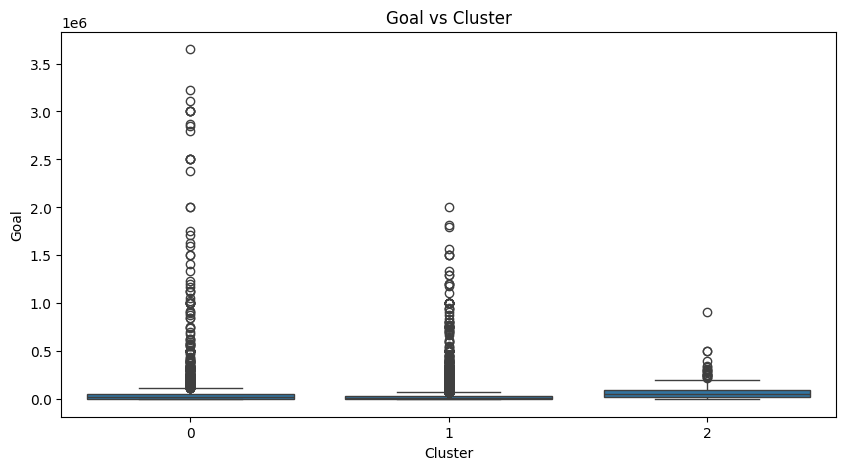

In [302]:
# distribution of goal of each cluster
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster',y='goal',data=k_means_res)
plt.title('Goal vs Cluster')
plt.xlabel('Cluster')
plt.ylabel('Goal')
plt.show()


In [292]:
# look at the categorical features of the clusters,
# the categories are all one hot encoded, so we need to consider that
# country all starts wtih country_
# category all starts with category_
# state_changed_at_yr all starts with state_changed_at_yr_
# created_at_month all starts with created_at_month_
# state_changed_at_month all starts with state_changed_at_month_
# deadline_month all starts with deadline_month_

# cluster 0
cluster_0 = k_means_res[k_means_res['cluster']==0]
cluster_0_cat = cluster_0[[col for col in cluster_0.columns if col.startswith('category_')]]
cluster_0_cat = cluster_0_cat.sum(axis=0)
cluster_0_cat.sort_values(ascending=False,inplace=True)
print("category for cluster 1:")
display(cluster_0_cat)

# cluster 1
cluster_1 = k_means_res[k_means_res['cluster']==1]
cluster_1_cat = cluster_1[[col for col in cluster_1.columns if col.startswith('category_')]]
cluster_1_cat = cluster_1_cat.sum(axis=0)
cluster_1_cat.sort_values(ascending=False,inplace=True)
print("category for cluster 2:")
display(cluster_1_cat)

# cluster 2
cluster_2 = k_means_res[k_means_res['cluster']==2]
cluster_2_cat = cluster_2[[col for col in cluster_2.columns if col.startswith('category_')]]
cluster_2_cat = cluster_2_cat.sum(axis=0)
cluster_2_cat.sort_values(ascending=False,inplace=True)
print("category for cluster 3:")
display(cluster_2_cat)


category for cluster 1:


category_Web             506
category_Hardware        454
category_Software        443
category_Gadgets         269
category_unknown         198
category_Apps            148
category_Plays           122
category_Musical          95
category_Wearables        92
category_Robots           76
category_Festivals        48
category_Sound            41
category_Experimental     38
category_Flight           37
category_Makerspaces      30
category_Spaces           25
category_Immersive        23
category_Places           18
category_Webseries         7
category_Shorts            5
category_Blues             2
category_Thrillers         1
dtype: int64

category for cluster 2:


category_Web             1631
category_Hardware        1584
category_Software        1359
category_unknown          909
category_Gadgets          839
category_Plays            704
category_Apps             584
category_Musical          448
category_Wearables        328
category_Festivals        278
category_Robots           200
category_Sound            193
category_Flight           190
category_Experimental     188
category_Immersive        165
category_Makerspaces       94
category_Spaces            87
category_Places            66
category_Shorts            33
category_Thrillers         12
category_Webseries         11
category_Blues              7
dtype: int64

category for cluster 3:


category_Hardware        249
category_Gadgets         119
category_unknown         110
category_Wearables        72
category_Robots           27
category_Sound            27
category_Software         27
category_Flight           14
category_Apps             10
category_Web               5
category_Musical           4
category_Spaces            3
category_Blues             1
category_Makerspaces       1
category_Immersive         1
category_Plays             1
category_Places            0
category_Shorts            0
category_Festivals         0
category_Thrillers         0
category_Experimental      0
category_Webseries         0
dtype: int64

In [293]:
# look at the categorical features of the clusters,
# the categories are all one hot encoded, so we need to consider that
# country all starts wtih country_
# category all starts with country_
# state_changed_at_yr all starts with state_changed_at_yr_
# created_at_month all starts with created_at_month_
# state_changed_at_month all starts with state_changed_at_month_
# deadline_month all starts with deadline_month_

# cluster 0
cluster_0 = k_means_res[k_means_res['cluster']==0]
cluster_0_cat = cluster_0[[col for col in cluster_0.columns if col.startswith('country_')]]
cluster_0_cat = cluster_0_cat.sum(axis=0)
cluster_0_cat.sort_values(ascending=False,inplace=True)
print("category for cluster 1:")
display(cluster_0_cat)

# cluster 1
cluster_1 = k_means_res[k_means_res['cluster']==1]
cluster_1_cat = cluster_1[[col for col in cluster_1.columns if col.startswith('category_')]]
cluster_1_cat = cluster_1_cat.sum(axis=0)
cluster_1_cat.sort_values(ascending=False,inplace=True)
print("category for cluster 2:")
display(cluster_1_cat)

# cluster 2
cluster_2 = k_means_res[k_means_res['cluster']==2]
cluster_2_cat = cluster_2[[col for col in cluster_2.columns if col.startswith('country_')]]
cluster_2_cat = cluster_2_cat.sum(axis=0)
cluster_2_cat.sort_values(ascending=False,inplace=True)
print("category for cluster 3:")
display(cluster_2_cat)

category for cluster 1:


country_US    1936
country_GB     257
country_CA     169
country_AU      90
country_FR      39
country_NL      37
country_IT      33
country_DE      26
country_DK      19
country_ES      16
country_NZ      16
country_IE      13
country_SE       9
country_CH       8
country_NO       7
country_BE       5
country_LU       0
dtype: int64

category for cluster 2:


category_Web             1631
category_Hardware        1584
category_Software        1359
category_unknown          909
category_Gadgets          839
category_Plays            704
category_Apps             584
category_Musical          448
category_Wearables        328
category_Festivals        278
category_Robots           200
category_Sound            193
category_Flight           190
category_Experimental     188
category_Immersive        165
category_Makerspaces       94
category_Spaces            87
category_Places            66
category_Shorts            33
category_Thrillers         12
category_Webseries         11
category_Blues              7
dtype: int64

category for cluster 3:


country_US    548
country_GB     65
country_CA     13
country_AU     13
country_NL      8
country_DE      7
country_FR      5
country_IE      4
country_DK      2
country_ES      1
country_BE      1
country_IT      1
country_NZ      1
country_CH      0
country_LU      0
country_NO      0
country_SE      0
dtype: int64

## DBSCAN

In [304]:
# dbscan
from sklearn.cluster import DBSCAN

silouette = []
pseudo_f_scores = []
eps_vals = []
min_sam = []

for eps in np.arange(0.1, 1, 0.1):
    for min_samples in range(2, 10):
        model = DBSCAN(eps=eps).fit(df)
        labels = model.labels_
        eps_vals.append(eps)
        min_sam.append(min_samples)
        silouette.append(silhouette_score(df,labels))
        pseudo_f_scores.append(calinski_harabasz_score(df,labels))
res_dbscan = pd.DataFrame({"eps":eps_vals,"min_samples":min_sam,"silouette":silouette,"pseudo_f_scores":pseudo_f_scores})
display(res_dbscan.sort_values(by=['silouette','pseudo_f_scores'],ascending=False))

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [119]:
res_dbscan

,eps,min_samples,silouette,pseudo_f_scores
0,0.1,2,-0.318687,3.052449
1,0.1,3,-0.318687,3.052449
2,0.1,4,-0.318687,3.052449
3,0.1,5,-0.318687,3.052449
4,0.1,6,-0.318687,3.052449
...,...,...,...,...
67,0.9,5,-0.201977,19.395426
68,0.9,6,-0.201977,19.395426
69,0.9,7,-0.201977,19.395426
70,0.9,8,-0.201977,19.395426


Looks pretty bad...